<a href="https://colab.research.google.com/github/TrentBoult18/TrentBoult18/blob/main/PreciousCode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset Preview:
   Cement\n(kg/m3)  Blast-furnace Slag\n(kg/m3)  Fly Ash\n(kg/m3)  \
0            336.0                          0.0               0.0   
1            140.1                          4.2             215.9   
2            350.0                          0.0               0.0   
3            162.0                        148.0             190.0   
4            225.0                          0.0               0.0   

   Water\n(kg/m3)  Super-plasticizer\n(kg/m3)  Coarse Aggregate \n(kg/m3)  \
0           182.0                         3.0                       986.0   
1           193.9                         4.7                      1049.5   
2           203.0                         0.0                       974.0   
3           179.0                        19.0                       838.0   
4           181.0                         0.0                      1113.0   

   Fine Aggregate\n(kg/m3)  Age of testing\n(day)  \
0                    817.0                     28   

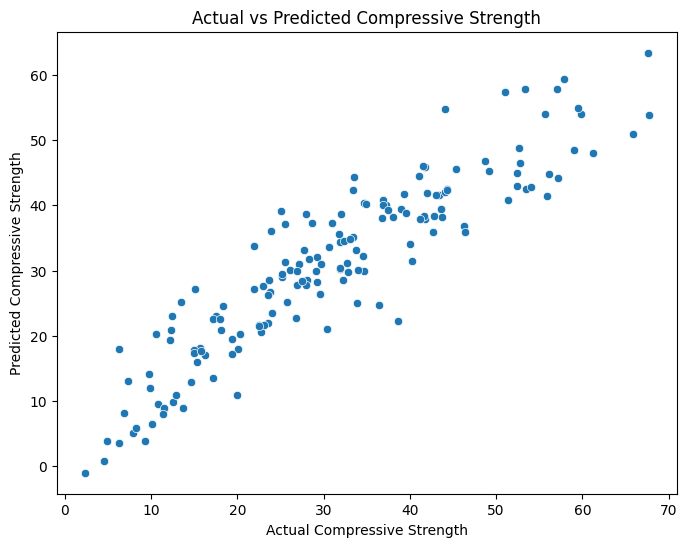

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the data
file_path = '/content/newdataset.csv.xlsx'
data = pd.read_excel(file_path, sheet_name='Data')

# Display first few rows of the data
print("Dataset Preview:")
print(data.head())

# Data Preprocessing: Renaming columns to make them easier to handle
data.columns = ['Cement', 'Blast_furnace_Slag', 'Fly_Ash', 'Water', 'Super_plasticizer',
                'Coarse_Aggregate', 'Fine_Aggregate', 'Age_of_testing', 'Compressive_Strength']

# Handle missing values (if any)
data = data.dropna()

# Outlier Detection and Removal using IQR method
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

# Removing outliers that lie outside 1.5 * IQR
data_clean = data[~((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1)]

# Define the feature variables (X) and the target variable (y) after removing outliers
X = data_clean.drop('Compressive_Strength', axis=1)
y = data_clean['Compressive_Strength']

# Split the data into training and test sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling (Normalize data for better performance)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train the Linear Regression model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Model Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print results
print("Mean Squared Error (MSE):", mse)
print("R-squared (R2):", r2)

# Optional: Visualize the predicted vs actual values
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Compressive Strength")
plt.ylabel("Predicted Compressive Strength")
plt.title("Actual vs Predicted Compressive Strength")
plt.show()
